<a href="https://colab.research.google.com/github/neworldemancer/DSF5/blob/master/Course_1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to machine learning & Data Analysis

Basic introduction on how to perform typical machine learning tasks with Python.

Prepared by Mykhailo Vladymyrov & Aris Marcolongo,
Data Science Lab, University Of Bern, 2023

This work is licensed under <a href="https://creativecommons.org/share-your-work/public-domain/cc0/">CC0</a>.

# Part 1: Introduction and Supervised Machine Learning

# What is Machine Learning?

## Why Machine Learning?



1. Do stuff  
2.   
3.  





## Learning from data

Unlike classical algorithms, created by a human to analyze some data:

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_1.png" width="60%"/>

in machine learning the data itself is used for to define the algorithm:

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_2.png" width="60%"/>


The boundaries are sometimes a bit fuzzy between classical and machine learning algorithm.

In fact when we create algorithms, the problem in hand (namely the data  related to the problem), drives us to choose one or another algorithm. And we then tune it, to perform well on a task in hand.

There are three macro-areas of ML algorithms:

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_4.png" width="60%"/>

In this course we will explore the foundations of the first two macro-areas, the ones most often used in applications.

Recent examples.

1. Hugginface https://github.com/huggingface/transformers and ChatGPT https://chat.openai.com/ from openAI unleashed the power of transformer architectures https://arxiv.org/abs/1706.03762.

2. Segment anything https://github.com/facebookresearch/segment-anything

<img src="https://raw.githubusercontent.com/facebookresearch/segment-anything/main/assets/masks2.jpg" width="40%"/>

3. Mediapipe https://mediapipe-studio.webapps.google.com/home

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_5.png" width="40%"/>

All these applications would have been impossible without using enormous amounts of data.

**In this case the X are the images and the Y are the positions of the pixels of the eyes, mouth, etc...**

## Classification vs Regression.

The two main tasks handled by (supervised) ML is regression and classification.
In regression we aim at modeling the relationship between the system's response (dependent variable) and one or more explanatory variables (independent variables).

Examples of regression would be predicting the temperature for each day of the year, or expenses of the household as a function of the number of children and adults.

In classification the aim is to identify what class does a data-point belong to. For example, the species or the iris plant based on the size of its petals, or whether an email is spam or not based on its content.

## Performance measures


1. Regression:
* Mean Square Error: $\textrm{MSE}=\frac{1}{n}\sum_i(y_i - \hat y(x_i))^2$
* Root Mean Square Error: $\textrm{RMSE}=\sqrt{\frac{1}{n}\sum_i(y_i - \hat y(x_i))^2}$
* Mean Absolute Error: $\textrm{MAE}=\frac{1}{n}\sum_i|y_i - \hat y(x_i)|$
* Median Absolute Deviation: $\textrm{MAD}=\textrm{median}(|y_i - \hat y(x_i)|)$
* Fraction of the explained variance: $R^2=1-\frac{\sum_i(y_i - \hat y(x_i))^2}{\sum_i(y_i - \bar y)^2}$,

where  $\hat y(x_i)$ is the prediction provided by the model for input $x_i$, $y_i$ is the exact value and $\bar y=\frac{1}{n}\sum_i y_i$.

2. Classification:
* Confusion matrix


<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/confusion_mtr.png" width="46%"/>

* Accuracy $=\frac{\textrm{TP} + \textrm{TN}}{\textrm{TP} + \textrm{FP} + \textrm{FN} + \textrm{TN}}$
* Precision $=\frac{\textrm{TP}}{\textrm{TP} + \textrm{FP}}$
* Recall $=\frac{\textrm{TP}}{\textrm{TP} + \textrm{FN}}$
* F1 $=\frac{2}{\frac{1}{\textrm{Precision}} + \frac{1}{\textrm{Recall}} }$
* Threat score (TS), or Intersection over Union: $\mathrm{IoU}=\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}+\mathrm{FP}}$


During model optimization the used measure in most cases must be differentiable. To this end usually some measure of similarities of distributions are employed (e.g. cross-entropy).

## Actual aim: Generalization

In supervised machine learning we distinguish two faces: `training` and `testing`. To measure model performance in an unbiassed way, we need to use different data to test the model than the data that the model was trained on.

Therefore we often use the 'train-test' split: e.g. 20% of all available dataset is reserved for model performance test, and the remaining 80% is used for actual model training (these percentages may vary).

CAVEAT: When the test set contains information about the training set that can spoil the resulting metrics we talk about `data leakage` or `information leakage`.

### Optimizing generalation error:


**variance:** suppose the model is trained again with different examples, but same number. What would be the spread of the predictions on the test set?

**bias**: suppose the model is trained again with different examples, but same number. How would the mean of these predictions differ from the real value?

**model capacity**: models with low capacity can fit just simple mappings (e.g. linear models)

**overfitting**: model is too complex and learns pattern leading to a very small training set error --> generalization error can be reduced.

**underfitting**: model is too simple w.r.t. the patterns that can be extracted from the data --> generalization error can be reduced.

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/Bias_variance_1.png" width="35%"/>

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/Bias_variance_2.png" width="60%"/>

**Capacity of F means that F is the function that represent a model**

### Good to know (not used in the course) :

**Small datasets:** cross validation

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/cv.png" width="60%"/>

**Hyper/Meta-parameters tuning:**

when doing meta-parameter tuning the previous procedure can be applied several times with different models. It is tempting to choose the one with the smallest error on the test set, but this may lead to a biased estimate, since the test set has been used when choosing the model. I**When tuning hyper-parameters 3 sets should be distinguished: training, validation and test sets.**

# Load libraries

In [6]:
# Scikit-learn (formerly scikits.learn and also known as sklearn) is a free
# software machine learning library for the Python programming language.
# It features various classification, regression and clustering algorithms,
# and is designed to interoperate with the Python numerical and scientific
# libraries NumPy and SciPy. (from wiki)

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance

# common visualization module
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

# numeric library
import numpy as np

import os
import pandas as pd
from time import time as timer
import tarfile

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

In [ ]:
pip install dtreeviz==1.4.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 1.7 MB/s eta 0:00:00


In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package

In [ ]:
if not os.path.exists('data'):
    path = os.path.abspath('.')+'/colab_material.tgz'
    tf.keras.utils.get_file(path, 'https://github.com/neworldemancer/DSF5/raw/master/colab_material.tgz')
    tar = tarfile.open(path, "r:gz")
    tar.extractall()
    tar.close()

262789/262789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Datasets

In this course we will use several synthetic and real-world datasets to illustrate the behavior of the models and exercise our skills.

## 1. Synthetic linear

In [ ]:
def get_linear(n_d=1, n_points=10, w=None, b=None, sigma=5):
  x = np.random.uniform(0, 10, size=(n_points, n_d))

  w = w or np.random.uniform(0.1, 10, n_d)
  b = b or np.random.uniform(-10, 10)
  y = np.dot(x, w) + b + np.random.normal(0, sigma, size=n_points)

  print('true slopes: w =', w, ';  b =', b)

  return x, y

true slopes: w = [6.11547568] ;  b = -5.300857345222607


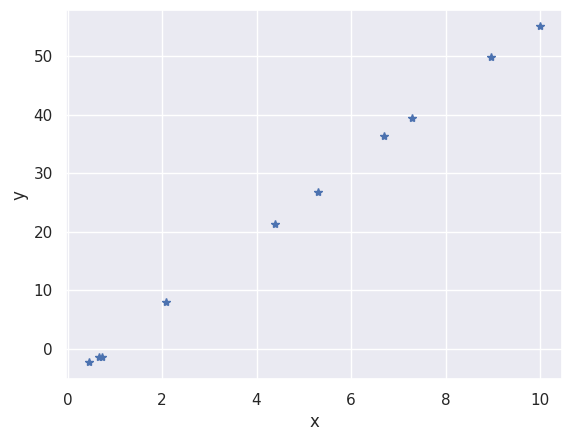

In [ ]:
x, y = get_linear(n_d=1, sigma=1)
plt.plot(x[:, 0], y, '*')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

true slopes: w = [4.1527935  2.99154386] ;  b = 1.9682585973282158


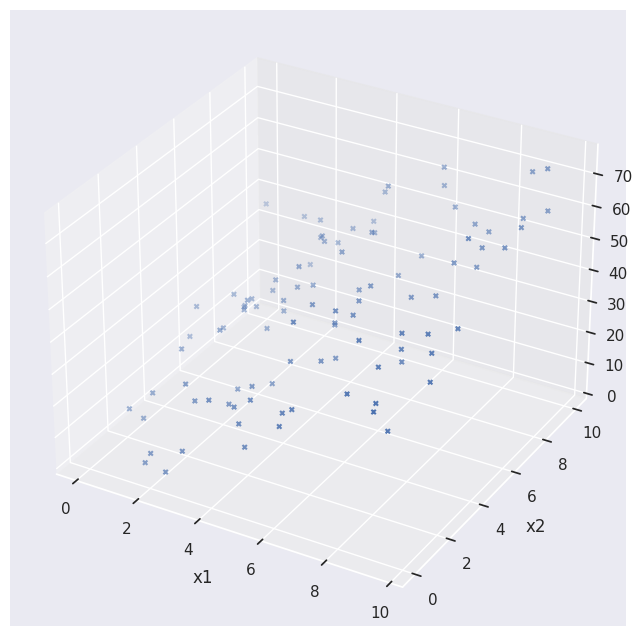

In [ ]:
n_d = 2
x, y = get_linear(n_d=n_d, n_points=100)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, marker='x', color='b',s=10)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

## 2. House prices

Subset of the Ames Houses dataset: http://jse.amstat.org/v19n3/decock.pdf

In [ ]:
def house_prices_dataset(return_df=False, return_df_xy=False, price_max=400000, area_max=40000):
  path = 'data/AmesHousing.csv'

  df = pd.read_csv(path, na_values=('NaN', ''), keep_default_na=False,  )

  rename_dict = {k:k.replace(' ', '').replace('/', '') for k in df.keys()}
  df.rename(columns=rename_dict, inplace=True)

  useful_fields = ['LotArea',
                  'Utilities', 'OverallQual', 'OverallCond',
                  'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond',
                  'HeatingQC', 'CentralAir', 'Electrical',
                  '1stFlrSF', '2ndFlrSF','GrLivArea',
                  'FullBath', 'HalfBath',
                  'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
                  'Functional','PoolArea',
                  'YrSold', 'MoSold'
                  ]
  target_field = 'SalePrice'

  df.dropna(axis=0, subset=useful_fields+[target_field], inplace=True)

  cleanup_nums = {'Street':      {'Grvl': 0, 'Pave': 1},
                  'LotFrontage': {'NA':0},
                  'Alley':       {'NA':0, 'Grvl': 1, 'Pave': 2},
                  'LotShape':    {'IR3':0, 'IR2': 1, 'IR1': 2, 'Reg':3},
                  'Utilities':   {'ELO':0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3},
                  'LandSlope':   {'Sev':0, 'Mod': 1, 'Gtl': 3},
                  'ExterQual':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'ExterCond':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'BsmtQual':    {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'BsmtCond':    {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'BsmtExposure':{'NA':0, 'No':1, 'Mn': 2, 'Av': 3, 'Gd': 4},
                  'BsmtFinType1':{'NA':0, 'Unf':1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ':5, 'GLQ':6},
                  'BsmtFinType2':{'NA':0, 'Unf':1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ':5, 'GLQ':6},
                  'HeatingQC':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'CentralAir':  {'N':0, 'Y': 1},
                  'Electrical':  {'':0, 'NA':0, 'Mix':1, 'FuseP':2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
                  'KitchenQual': {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'Functional':  {'Sal':0, 'Sev':1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2':5, 'Min1':6, 'Typ':7},
                  'FireplaceQu': {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'PoolQC':      {'NA':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'Fence':       {'NA':0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv':4},
                  }

  df_X = df[useful_fields].copy()
  df_X.replace(cleanup_nums, inplace=True)  # convert continous categorial variables to numerical
  df_Y = df[target_field].copy()

  x = df_X.to_numpy().astype(np.float32)
  y = df_Y.to_numpy().astype(np.float32)

  if price_max>0:
    idxs = y<price_max
    x = x[idxs]
    y = y[idxs]

  if area_max>0:
    idxs = x[:,0]<area_max
    x = x[idxs]
    y = y[idxs]

  return (x, y, df) if return_df else ((x, y, (df_X, df_Y)) if return_df_xy else (x,y))

In [ ]:
x, y, df = house_prices_dataset(return_df=True)
print(x.shape, y.shape)
df.head()

(2847, 24) (2847,)


,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NA,IR1,Lvl,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900


In [ ]:
df.describe()

,Order,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2929.000000,2.929000e+03,2929.000000,2439.000000,2929.00000,2929.000000,2929.000000,2929.000000,2929.000000,2906.000000,...,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000
mean,1465.461591,7.143956e+08,57.379652,69.223042,10148.06282,6.095254,5.563332,1971.344486,1984.258791,101.931865,...,93.749744,47.549676,23.019461,2.593377,16.007511,2.244111,50.652441,6.216456,2007.790372,180800.599522
std,846.104363,1.887262e+08,42.643257,23.370001,7881.35958,1.411122,1.111678,30.243747,20.859616,179.133457,...,126.383085,67.489204,64.148601,25.145578,56.096167,35.603235,566.440219,2.714863,1.316832,79899.955086
min,1.000000,5.263011e+08,20.000000,21.000000,1300.00000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.000000,5.284770e+08,20.000000,58.000000,7440.00000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.000000,5.354532e+08,50.000000,68.000000,9434.00000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2198.000000,9.071811e+08,70.000000,80.000000,11556.00000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.00000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


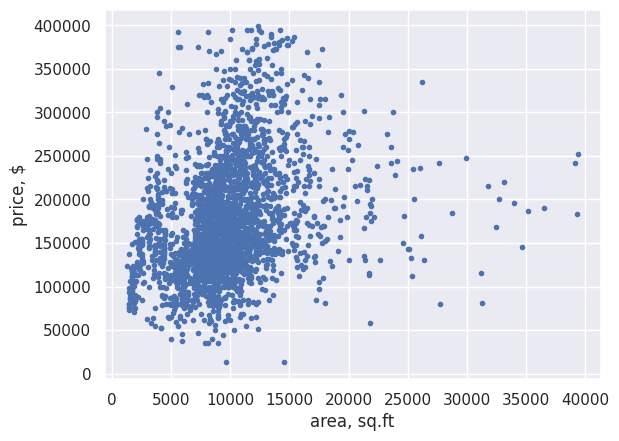

In [ ]:
plt.plot(x[:, 0], y, '.')
plt.xlabel('area, sq.ft')
plt.ylabel('price, $');
plt.show()

## 3. Blobs

In [5]:
x, y = make_blobs(n_samples=1000, centers=[[0,0], [5,5], [10, 0]])
colors = "ygr"
for i, color in enumerate(colors):
    idx = y == i
    plt.scatter(x[idx, 0], x[idx, 1], c=color, edgecolor='gray', s=25)
plt.show()

NameError: name 'make_blobs' is not defined

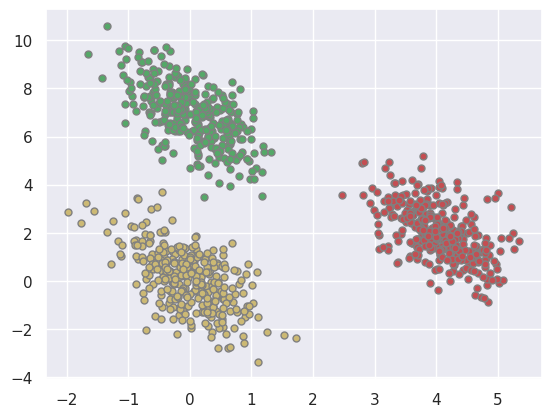

In [ ]:
x, y = make_blobs(n_samples=1000, centers=[[0,0], [5,5], [10, 0]])

transformation = [[0.4, 0.2], [-0.4, 1.2]]  # affine transformation matrix
x = np.dot(x, transformation)               # applied to point coordinated to make blobs less separable

colors = "ygr"
for i, color in enumerate(colors):
    idx = y == i
    plt.scatter(x[idx, 0], x[idx, 1], c=color, edgecolor='gray', s=25)
plt.show()



## 4. MNIST

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting (taken from http://yann.lecun.com/exdb/mnist/). Each example is a 28x28 grayscale image and the dataset can be readily downloaded from Tensorflow.

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Let's check few samples:

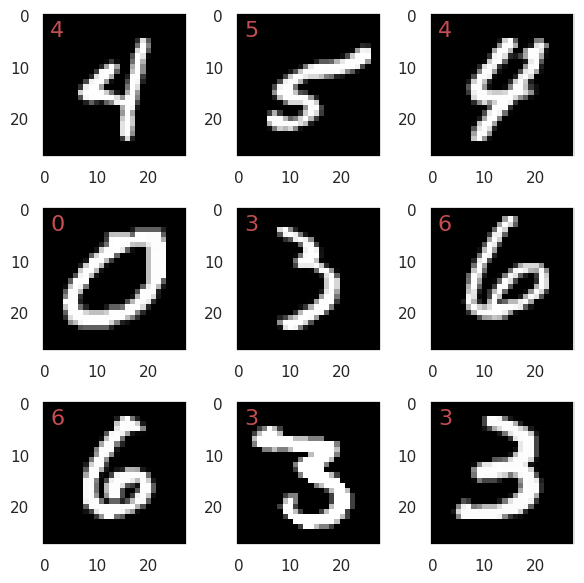

In [ ]:
n = 3
fig, ax = plt.subplots(n, n, figsize=(2*n, 2*n))
ax = [ax_xy for ax_y in ax for ax_xy in ax_y]
for axi, im_idx in zip(ax, np.random.choice(len(train_images), n**2)):
  im = train_images[im_idx]
  im_class = train_labels[im_idx]
  axi.imshow(im, cmap='gray')
  axi.text(1, 4, f'{im_class}', color='r', size=16)
  axi.grid(False)
plt.tight_layout()
plt.show()

## 5. Fashion MNIST

`Fashion-MNIST` is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. (from https://github.com/zalandoresearch/fashion-mnist)

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Let's check few samples:

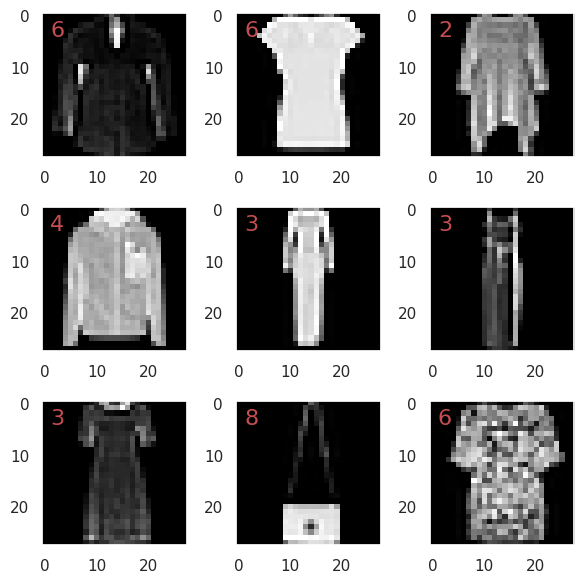

In [ ]:
n = 3
fig, ax = plt.subplots(n, n, figsize=(2*n, 2*n))
ax = [ax_xy for ax_y in ax for ax_xy in ax_y]
for axi, im_idx in zip(ax, np.random.choice(len(train_images), n**2)):
  im = train_images[im_idx]
  im_class = train_labels[im_idx]
  axi.imshow(im, cmap='gray')
  axi.text(1, 4, f'{im_class}', color='r', size=16)
  axi.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
fmnist_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Each of the training and test examples is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

# `scikit-learn` interface

In this course we will primarily use the `scikit-learn` module.
You can find extensive documentation with examples in the [user guide](https://scikit-learn.org/stable/user_guide.html)

The module contains A LOT of different machine learning methods, and here we will cover only few of them. What is great about `scikit-learn` is that it has a uniform and consistent interface.

All the different ML approaches are implemented as classes with a set of same main methods:

1. `fitter = ...`: Create fitter object.
2. `fitter.fit(x, y[, sample_weight])`: Fit model to predict from list of smaples `x` a list of target values `y`.
3. `y_pred = fitter.predict(X)`: Predict using the trained model.
4. `s = fitter.score(x, y[, sample_weight])`: Obtain a relevant performance measure of the trained model.

This allows one to easily replace one approach with another and find the best one for the problem at hand, by simply using a regression/classification object of another class, while the rest of the code can remain the same.


It is useful to know that generally in scikit-learn the input data is represented as a matrix $X$ of dimensions `n_samples x n_features` (also called the `design matrix`), whereas the supervised labels/values are stored in a matrix $Y$ of dimensions `n_samples x n_target` .

# 1.Linear models

In many cases the scalar value of interest - dependent variable - is (or can be approximated as) linear combination of the independent variables.

In linear regression the estimator is searched in the form: $$\hat{y}(\bar{x} | w_0,\bar{w}) = w_0 + w_1 x_1 + ... + w_p x_p$$

The parameters $\bar{w} = (w_1,..., w_p)$ and $w_0$ are designated as `coef_` and `intercept_` in `sklearn`.

Reference: https://scikit-learn.org/stable/modules/linear_model.html

## 1. Linear regression

[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) fits a linear model with coefficients $\bar{w} = (w_1,..., w_p)$ and $w_0$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Mathematically it solves a problem of the form:  $$(w^{opt}_0,\bar{w}^{opt}) = \arg min_{w_0,\bar{w}} \sum_i \left(\hat{y}(\bar{x_i} | w_0,\bar{w})-y_i\right)^2$$

The function:

$$L(w,\bar{w}) \equiv \sum_i \left(\hat{y}(\bar{x_i} | w_0,\bar{w})-y_i\right)^2$$

is called the `loss function` for linear regression and we say that during training/fitting the loss function is `minimized`.

In terms of the design matrix $X_{i,p}$, where $i$ ranges over the number of samples and $p$ across the number of features:

$$L(w,\bar{w})=\sum_i \left((w_0 + \sum_p X_{i,p}w_p)-y_i\right)^2$$

This makes it explicit that the function to minimize is quadratic in $w$ and an analytical solution is therefore available (no numerical optimization).

true slopes: w = [4.6690901] ;  b = 8.985607931629477


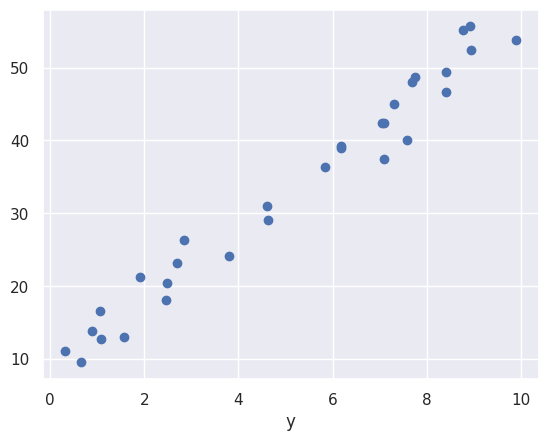

In [ ]:
x, y = get_linear(n_d=1, sigma=3, n_points=30)  # p==1, 1D input
plt.scatter(x, y);
plt.xlabel('x')
plt.xlabel('y')
plt.show()

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression()

In [ ]:
w, w0 = reg.coef_, reg.intercept_
print(w, w0)

[4.8247064] 8.632203032019333


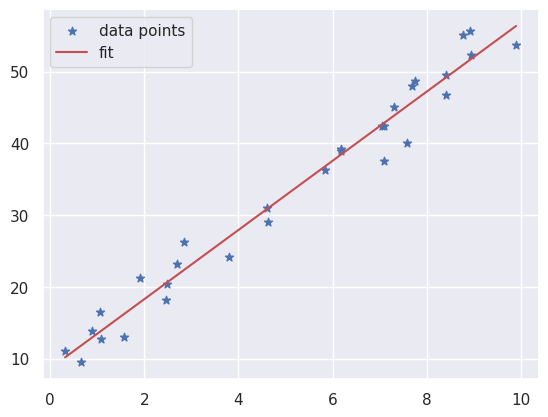

In [ ]:
plt.scatter(x, y, marker='*', label='data points')
x_f = np.linspace(x.min(), x.max(), 10)
y_f = w0 + w[0] * x_f
plt.plot(x_f, y_f, label='fit', c='r')
plt.legend()
plt.show()

In [ ]:
# mse
np.std(y - reg.predict(x))  # or use metrics.mean_squared_error(..., squared=False)

2.515292235020223

In [ ]:
# R2
reg.score(x, y)

0.9705552248164384

Let's try 2D input.
Additionally, here we will split the whole dataset into training and test subsets using the `train_test_split` function:

true slopes: w = [6.0858559  1.58123763] ;  b = -5.183691920975746


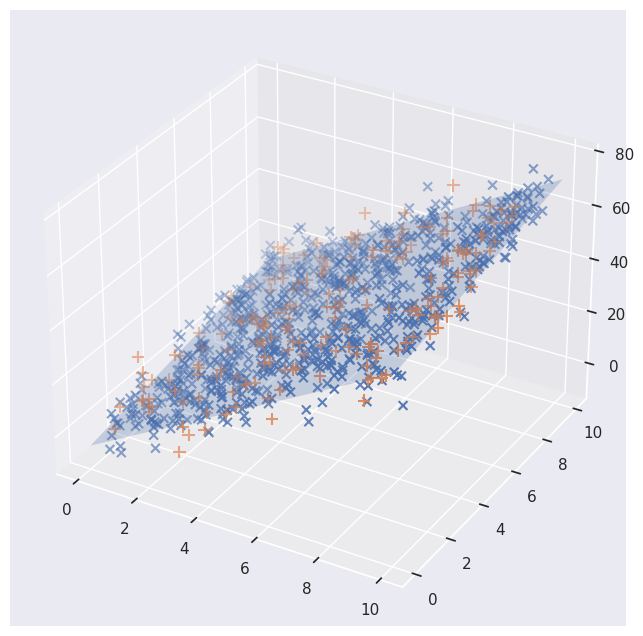

In [ ]:
n_d = 2
x, y = get_linear(n_d=n_d, n_points=1000, sigma=5)

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train, marker='x', s=40)
ax.scatter(x_test[:,0], x_test[:,1], y_test, marker='+', s=80)

xx0 = np.linspace(x[:,0].min(), x[:,0].max(), 10)
xx1 = np.linspace(x[:,1].min(), x[:,1].max(), 10)
xx0, xx1 = [a.flatten() for a in np.meshgrid(xx0, xx1)]
xx = np.stack((xx0, xx1), axis=-1)
yy = reg.predict(xx)
ax.plot_trisurf(xx0, xx1, yy, alpha=0.25, linewidth=0)
plt.show()

In [ ]:
# mse
print('train mse =', np.std(y_train - reg.predict(x_train)))
print('test mse =', np.std(y_test - reg.predict(x_test)))

train mse = 4.899105923454451
test mse = 5.318109444894435


In [ ]:
# R2
print('train R2 =', reg.score(x_train, y_train))
print('test R2 =', reg.score(x_test, y_test))

train R2 = 0.9347503691201493
test R2 = 0.9124778576208005


## EXERCISE 1. Linear Regression for AMES

(2847, 24) (2847,)
rmse = 65971.41
rmse = 65971.41


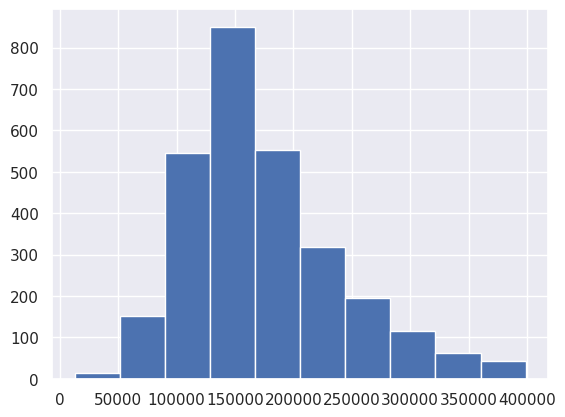

In [ ]:
# WARM-UP: built a baseline

x, y = house_prices_dataset()
print(x.shape,y.shape)
plt.hist(y)
baseline = np.mean(y)
residuals = y - baseline
print('rmse =', np.std(residuals))
print('rmse =', np.sqrt( np.mean(residuals**2)   ) )


Use linear regression to fit house prices dataset.

train rmse = 24228.111
test rmse = 32849.82
train mae = 17710.426
test mae = 19970.492
train R2 = 0.8611208200454712
test R2 = 0.777436375617981


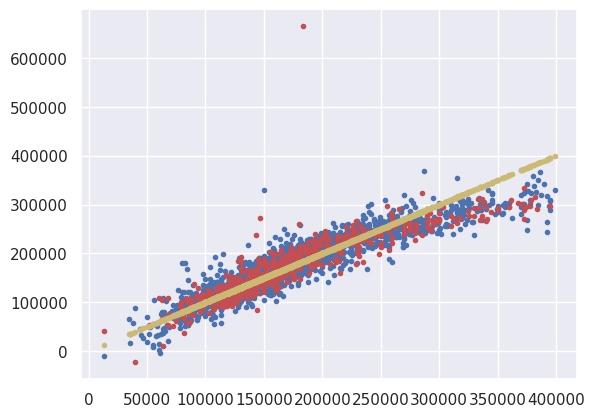

In [ ]:
x, y = house_prices_dataset()

# 1. make train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 2. fit the model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

# 3. evaluate RMSE, MAD and R2 on trained and test datasets
# rmse
y_p_train = reg.predict(x_train)
y_p_test = reg.predict(x_test)

residuals_train = y_train - y_p_train
residuals_test = y_test - y_p_test

# mse
print('train rmse =', np.sqrt( np.mean(residuals_train**2)   ) )
print('test rmse =', np.sqrt( np.mean(residuals_test**2)   ) )
# mse
print('train mae =', np.mean(np.abs(residuals_train)))
print('test mae =', np.mean(np.abs(residuals_test)))
# R2
print('train R2 =', reg.score(x_train, y_train))
print('test R2 =', reg.score(x_test, y_test))

plt.plot(y_train, y_p_train, 'b.', label="train")
plt.plot(y_test, y_p_test, 'r.', label="test")
plt.plot(y_train, y_train, 'y.', label="Perfect distribution")

## 2. Logistic regression

***-binary case***

Logistic regression, despite its name, is a linear model for classification rather than regression. Examples of binary output can be \{sold, not sold \} when predicting whether a product will be sold or not, or \{failed, passed\} to predict the probability of a student of failing a class. It is custom to map the mutually exclusive classes to targets $y_i \in \{0,1\}$, called the positive and negative class respectively.

In binary logistic regression the probability $p$ of a point belonging to the positive is modelled as: $$p =\sigma (w_0 + w_1 x_1 + ... + w_p x_p)$$, where the sigmoid function is defined as:

$$\sigma(x)=\frac{1}{1+e^{-x}} $$

The sigmoid function maps the real numbers output of a generic linear function to [0,1].

The parameters $w$ are in this case trained to minimize the following loss function:

$$L(w_0,\bar{w})=-\sum_i y_i \log(p_i)$$

***-more classes***

We have a `multiclass` model when each sample must belong to one of several mutually exclusive classes, e.g. to predict the reaction to a treatment between the classes \{negative, not significant, positive \}.

We introduce the one-hot representation of the output $y_i^{OH}(c)=1$ if sample $i$ belongs to class $c$ and $0$ otherwise. This generates from a multiclass label like $y_i \in \{cat, dog, other\}$ three binary labels: $y_i^{\text{OH}}(\text{dog}),y_i^{\text{OH}}(\text{cat}),y_i^{\text{OH}}(\text{other})  \in \{0,1\}$.

Two options are available for solving multiclass problems.

* One-versus-rest (`ovr`) performs several independent fits of binary logistic regressions models, one for each class $c$:
$$p'_c =\sigma (w_{c,0} + w_{c,1} x_1 + ... + w_{c,p} x_{p})$$
minimizing the binary loss function for each class separately:

$$L_c(w_0,\bar{w})=-\sum_i y_i^{\text{OH}}(c) \log(p'_{i,c})$$

Note that if $y_i^{\text{OH}}(c)=0$ than sample i must belong to one of the other classes (hence the name).

Since each model is trained independently the probabilitities $p'_c$ do not need to sum to one. This constrained (if needed) is often imposed a-posteriori:
$$p_c = \frac{p'_{c}}{\sum_{c'}{p'_{c'}}}$$

* The multinomial (`multinomial`) logistic regression evaluates the so-called logits and then aggregates them using the softmax operator:

$$\text{logits}_{c}=w_{c,0} + w_{c,1} x_1 + ... + w_{c,p} x_{p}$$
$$p_c = \text{softmax}(\text{logits})_c=\frac{e^{\text{logits}_c}}{\sum_{c'} e^{\text{logits}_{c'}}}$$

Note that the probabilities returned by the models are already normalized before training. All the parameters are then trained simultaneously and minimize the loss function:

$$L(\{w_{0,c}\},\{\bar w_{c}\} )=-\sum_i \left(\sum_c y_i^{OH}(c)\log p_{i,c}\right)$$

NOTE 1: the choices done here may seem ad-hoc. They are the result of several efforts in data-analysis research. E.g. the loss function has its derivation into probability theory and the maximum likelyhood framework.

NOTE 2: if we have a problem with multiple classes but not exclusive, this is called a `multilabel` setting. This can be tackled by logistic regression fitting individual binary models.

In [3]:
# routine for coloring 2d space according to class prediction

def plot_prediction_2d(x_min, x_max, y_min, y_max, classifier, ax=None):
  """
  Creates 2D mesh, predicts class for each point on the mesh, and visualises it
  """

  mesh_step = .02  # step size in the mesh
  x_coords = np.arange(x_min, x_max, mesh_step) # coordinates of mesh colums
  y_coords = np.arange(y_min, y_max, mesh_step) # coordinates of mesh rows

  # create mesh, and get x and y coordinates of each point point
  # arrenged as array of shape (n_mesh_rows, n_mesh_cols)
  mesh_nodes_x, mesh_nodes_y = np.meshgrid(x_coords, y_coords)

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].

  # prepare xy pairs for prediction: matrix of size (n_mesh_rows*n_mesh_cols, 2)
  mesh_xy_coords = np.stack([mesh_nodes_x.flatten(),
                             mesh_nodes_y.flatten()], axis=-1)

  # obtain class for each node
  mesh_nodes_class = classifier.predict(mesh_xy_coords)


  # reshape to the shape (n_mesh_rows, n_mesh_cols)==mesh_nodes_x.shape for visualization
  mesh_nodes_class = mesh_nodes_class.reshape(mesh_nodes_x.shape)

  # Put the result into a color countour plot
  ax = ax or plt.gca()
  ax.contourf(mesh_nodes_x,
              mesh_nodes_y,
              mesh_nodes_class,
              cmap='Pastel1', alpha=0.5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-7-3f9f3a1c2e99>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_0[idx], x_1[idx], c=color, cmap=plt.cm.Paired,


training accuracy : 0.995 (multinomial)


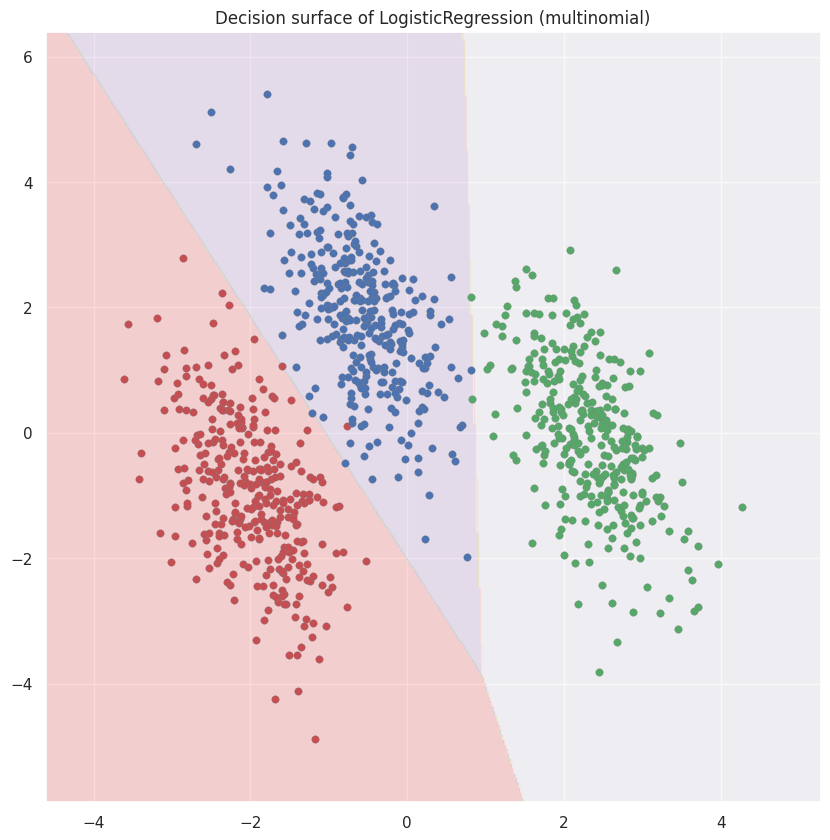

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-7-3f9f3a1c2e99>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_0[idx], x_1[idx], c=color, cmap=plt.cm.Paired,


training accuracy : 0.976 (ovr)


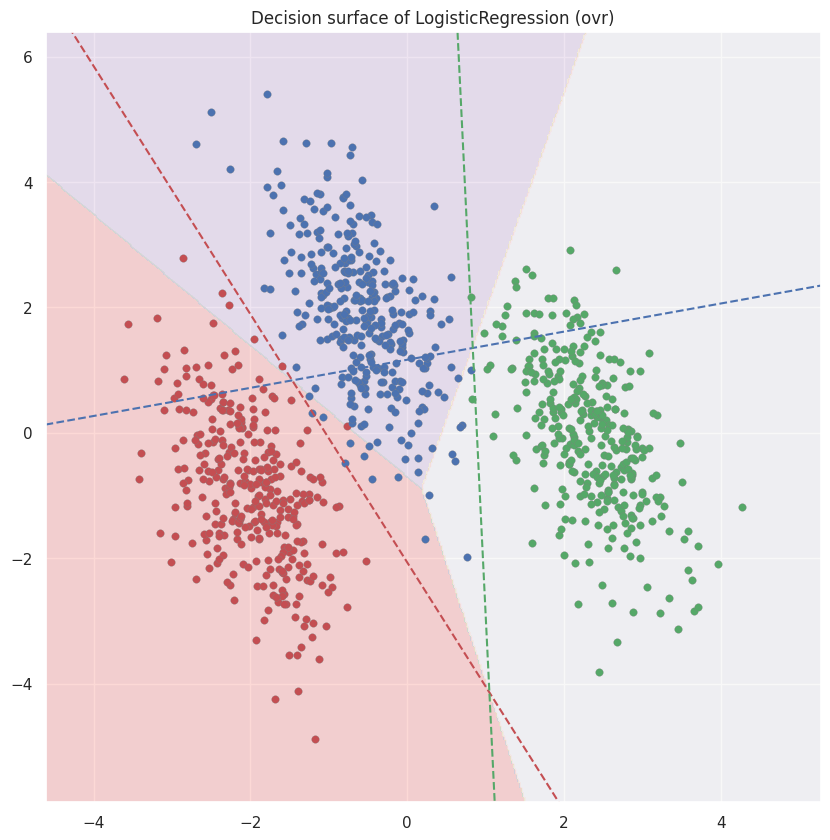

In [7]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
x, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
x = np.dot(x, transformation)

for multi_class in ('multinomial', 'ovr'):
    # do fit
    clf = linear_model.LogisticRegression(solver='sag', max_iter=100,
                             multi_class=multi_class, )
    clf.fit(x, y)

    # print the training scores
    print("training accuracy : %.3f (%s)" % (clf.score(x, y), multi_class))

    # get range for visualization
    x_0 = x[:, 0]
    x_1 = x[:, 1]
    x_min = x_0.min() - 1
    x_max = x_0.max() + 1
    y_min = x_1.min() - 1
    y_max = x_1.max() + 1

    plt.figure(figsize=(10,10))
    plot_prediction_2d(x_min, x_max, y_min, y_max, classifier=clf)

    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = 'rbg'

    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(x_0[idx], x_1[idx], c=color, cmap=plt.cm.Paired,
                    edgecolor='gray', s=30, linewidth=0.2)

    # Plot the three one-against-all classifiers
    if multi_class=='ovr':
        coef = clf.coef_
        intercept = clf.intercept_
        def plot_hyperplane(c, color):
            def line(x0):
                return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
            plt.plot([x_min, x_max], [line(x_min), line(x_max)],
                    ls="--", color=color)
        for i, color in zip(clf.classes_, colors):
            plot_hyperplane(i, color)

    plt.show()



## EXERCISE 2. Logistic Regression for FMNIST

In [12]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

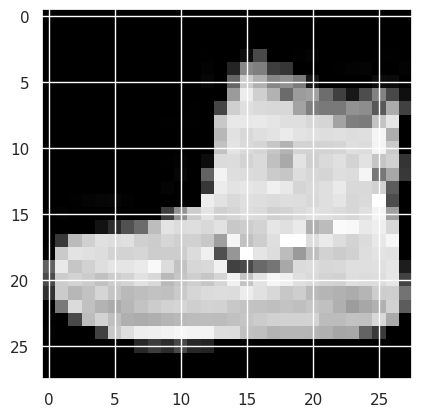

In [19]:
# This is a normalization step, which can help the training of some models. It does not hurt anyway

train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

plt.imshow(train_images[0], cmap="gray")

Instead of using the raw images as input to the model (what would be the issue?) we perform a feature extraction step.

You can use the following function that takes the frequency content of the feature (power spectrum) as an example.

The process of trying out several features extracted from the data as input to a model is called *(manual) feature engineering*

In [28]:
#Helper function for point 2

def extract_features(images):
    def compute_power_spectrum(image):
        fourier_transform = np.fft.fft2(image)
        power_spectrum = np.abs(fourier_transform) ** 2
        power_spectrum /= np.sum(power_spectrum)
        return power_spectrum.flatten()
    power_spectrum_features = []
    for img in images:
        spectrum = compute_power_spectrum(img)
        power_spectrum_features.append(spectrum)
    return np.array(power_spectrum_features)


extract_features(train_images_norm)

array([[4.77210507e-01, 3.96450543e-02, 6.75171739e-04, ...,
        3.78331302e-03, 2.99408750e-03, 2.38584823e-02],
       [5.33851433e-01, 1.23702448e-01, 4.50002664e-03, ...,
        4.56634003e-03, 6.84022364e-03, 4.57299515e-03],
       [3.51119325e-01, 2.02491180e-01, 2.14785502e-02, ...,
        8.13501208e-04, 1.13588662e-03, 3.69639113e-04],
       ...,
       [3.55102236e-01, 1.96027658e-01, 1.93202553e-02, ...,
        2.50688869e-03, 4.28495626e-03, 6.16366013e-04],
       [5.51965371e-01, 9.32563268e-02, 5.85453179e-03, ...,
        5.81928511e-03, 7.77101244e-03, 4.05396786e-03],
       [1.61238431e-01, 4.57474856e-03, 3.11347018e-03, ...,
        3.04174714e-03, 2.18575424e-03, 4.44793719e-03]])

Now use a multinomial logistic regression classifier, and measure the accuracy, following the steps:

In [42]:
# 1. Create classifier
classifier = linear_model.LogisticRegression(solver="sag", max_iter=20, multi_class='multinomial')

# 3. Extract the features and fit the model

train_features = extract_features(train_images_norm)
test_features  = extract_features(test_images_norm)

classifier.fit(train_features, train_labels)

# 3
# evaluate accuracy on train and test datasets. Use for this the reg.score.
# evaluate the confusion matrix on the test set using, from sklearn import metrics the metrics.confusion_matrix method (check documentation)
print('train accuracy =', classifier.score(train_features, train_labels))
print('test accuracy =', classifier.score(test_features, test_labels))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


train accuracy = 0.67375
test accuracy = 0.668


We can summarize the confusion matrix plotting precision and recall for each category. Given the confusion matrix you can use the following funtion:

[[678  11  84  96  37  15  58   3  11   7]
 [ 29 814  14 131   3   0   7   0   2   0]
 [ 71   1 714   9 117   6  69   0   8   5]
 [159  55  13 742  11   3  13   0   3   1]
 [165   3 373  74 292  18  61   0  11   3]
 [  3   1   3   1   0 793   2 132  12  53]
 [241   2 317  54 154  13 181   0  31   7]
 [  0   0   0   0   0  33   0 872  17  78]
 [  5   2  83  10   9  27   5  20 773  66]
 [ 40   0   4   8   4  16  13  71  23 821]]
Check that you get the same accuracy from the score method: 0.668


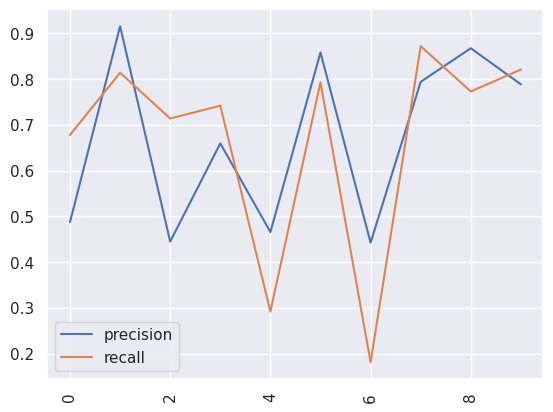

In [46]:
from sklearn import metrics

# Helper function for point 6
def get_class_specific_prec_recall(cm):
    n_cat=cm.shape[0]
    precisions=[]
    recalls=[]
    #precision
    for i in range(n_cat):
        precisions.append(cm[i,i]/np.sum(cm[:,i]))

    #recall
    for i in range(n_cat):
        recalls.append(cm[i,i]/np.sum(cm[i,:]))
    return precisions, recalls


test_labels_prediction = classifier.predict(test_features)
confusion_matrix = metrics.confusion_matrix(test_labels, test_labels_prediction)

print(confusion_matrix)
print(f'Check that you get the same accuracy from the score method: {np.sum([confusion_matrix[i,i] for i in range(10)])/np.sum(confusion_matrix)}')

precisions, recalls = get_class_specific_prec_recall(confusion_matrix)

plt.plot(precisions, label='precision')
plt.plot(recalls, label='recall')
plt.xticks(rotation=90)
plt.legend()

plt.show()


In [ ]:
# 6 (optional). Inspect the confusion metrics, compute using matrix manipulations the precision and recall for each category and make a plot where on the x axes you have the categories and on the y axes precision and recall.

In [ ]:
# 1. Review the examples showcasing the usage of the random forest model or xgboost.

# 2. Fit the model

# 3. Inspect training and test accuracy

# 4. Try to improve performance by adjusting hyperparameters.
# How does it compare to linear model? Can you make a plot of y_pred vs y_exact as you did for a linear model and compare visually ?

# 5. Study the feature importance
